1. 

a. a classification decision tree is a machine learning model that is used to solve problems involving categorizing data points into classes based on their features. the model is a tree-like structure where each node is a decision point based on one of the features and each branch leads to an outcome or classification. it can be used in medical diagnosis to identify diseases based on symptoms, test results and patient history.

b. the difference between the predictions of a classification decision tree and multiple linear regression is that decision trees make predictions by sorting data through the input of the features before reaching a final classification while the multiple linear regression makes regression decisions which predicts continuous outcomes using variables

2.

2.1 Accuracy measures the proportion of true results (both true positives and true negatives) in the population. this is useful when all errors are equally as important, thus we just want to see the accuracy of the model

2.2 Sensitivity measures the proportion of actual positives that are correctly identified. this is useful in medical use where high sensitivity is important in identifying medical conditions, even if there are false positives, it is better to have high sensitivity to be safe.

2.3 Specificity measures the proportion of actual negatives that are correctly identified. this is important in cases where the false positives are costly, such as in detecting fraud transactions.

2.4 Precision measures the proportion of positive identifications that were actually correct. this is valuable in spam detection in emails where we try to minimize false positives.

3

In [6]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

In [11]:
ab.drop(columns=['Weight_oz', 'Width', 'Height'], inplace=True)
ab.dropna(inplace=True)

In [12]:
ab['Pub year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')

In [13]:
print("First few rows of the dataset:")
print(ab.head())

print("\nData types:")
print(ab.dtypes)

print("\nSummary statistics for numeric columns:")
print(ab.describe())

print("\nValue counts for 'Hard_or_Paper':")
print(ab['Hard_or_Paper'].value_counts())

First few rows of the dataset:
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P       304         Adams Media   
1       15.00         10.20             P       273          Free Press   
2        1.50          1.50             P        96  Dover Publications   
3       15.99         10.87             P       672    Harper Perennial   
4       30.50         16.77             P       720               Knopf   

   Pub year     ISBN-10  Thick  
0      2010  1605506249    0.8  
1      2008  

4.

In [15]:
from sklearn.model_selection import train_test_split

# Assuming ab_reduced_noNaN is our preprocessed dataset
ab_train, ab_test = train_test_split(ab, test_size=0.2, random_state=42)

# Report the number of observations in each set
print("Training set size:", len(ab_train))
print("Test set size:", len(ab_test))


Training set size: 255
Test set size: 64


In [17]:
y = pd.get_dummies(ab["Hard_or_Paper"])['H']
X = ab[['List Price']]

y is the outcome we are predicting with our decision tree, here it is a binary variable classified as 1 is hardcover (abbreviated as H) and 0 is paperback (no H)

x is the predictor variable that were going to use to predict whether hardcover or paperback. here it is the list price so were using the price of the book to determine H

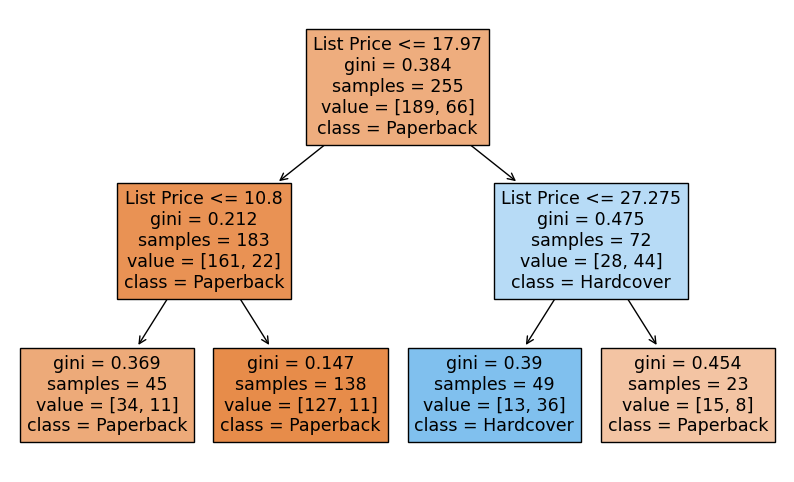

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Set up X and y
y = pd.get_dummies(ab["Hard_or_Paper"])['H']
X = ab[['List Price']]

# Split X and y into training and testing sets to match ab_reduced_noNaN_train and ab_reduced_noNaN_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier with a max depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Plot the decision tree structure
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()


the top node splits based on the listing price, it procedes to the next node based on whether or not the listing price is over or under a certain amount. the second nodes check another price condition and procedes to the third and final node which makes the prediction on whether or not it is hardcover or paperback.

5.

In [21]:
# Set up X and y with the new features
X = ab[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab["Hard_or_Paper"])['H']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 255
Test set size: 64


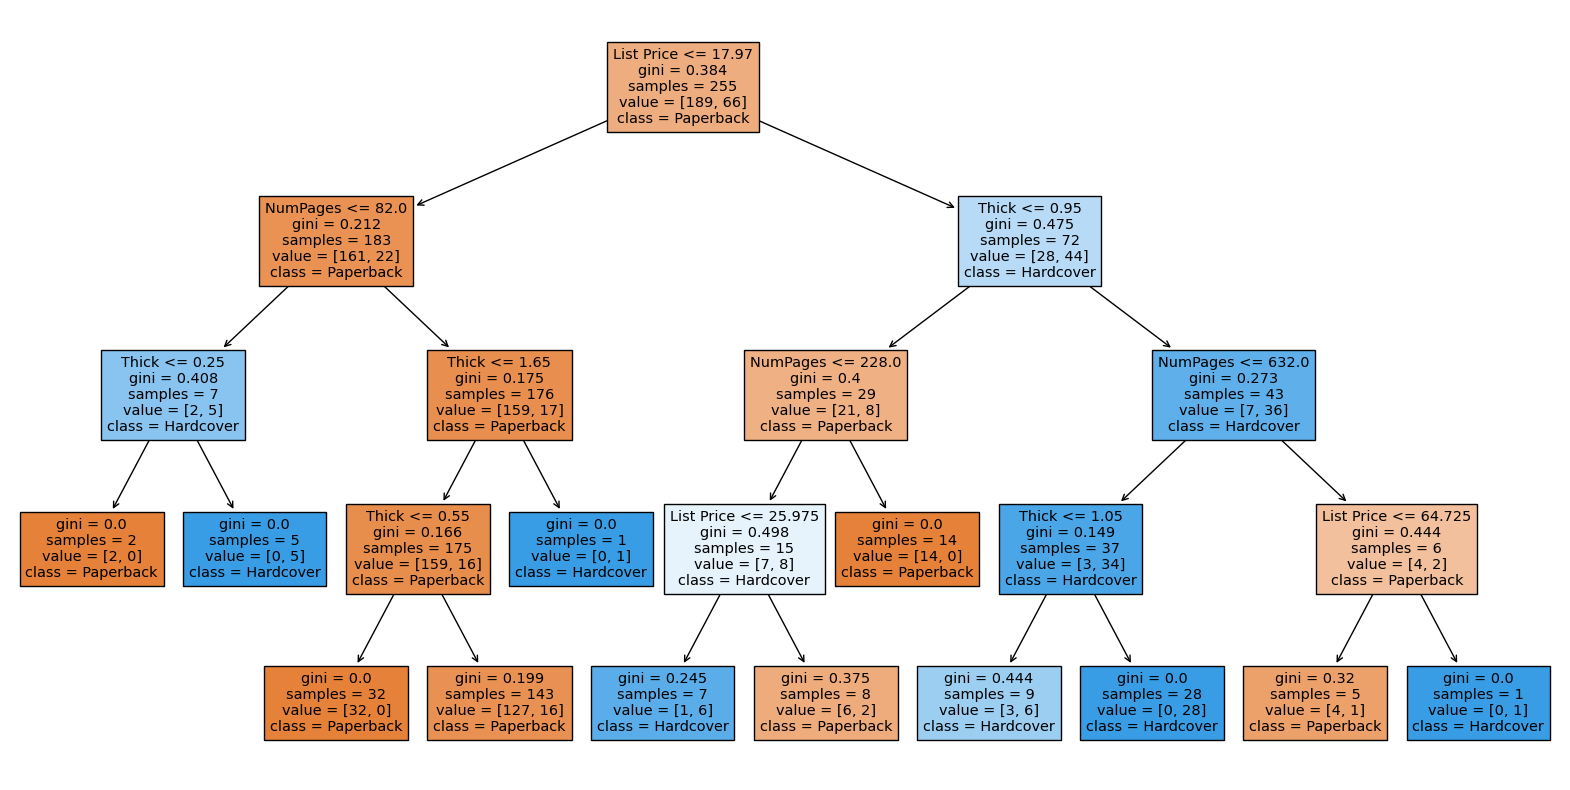

In [22]:
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()

the predictions made here are using more variables compared to clf1, here we are using the number of pages, the thickness of the book, and the price to determine whether its hardcover or paperback. each node uses one of the variables to lead it to the next one.

6.

In [32]:
# For clf (with only 'List Price')
X_test_clf = X_test[['List Price']]  # Make sure test data has the correct feature
y_pred_clf = clf.predict(X_test_clf)

# For clf2 (with 'NumPages', 'Thick', and 'List Price')
X_test_clf2 = X_test[['NumPages', 'Thick', 'List Price']]  # Make sure test data has the correct features
y_pred_clf2 = clf2.predict(X_test_clf2)


In [35]:
from sklearn.metrics import confusion_matrix

cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

In [36]:
# Function to calculate sensitivity, specificity, and accuracy
def calculate_metrics(cm):
    TP = cm[1, 1]  # True Positive
    TN = cm[0, 0]  # True Negative
    FP = cm[0, 1]  # False Positive
    FN = cm[1, 0]  # False Negative
    
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) != 0 else 0
    
    return sensitivity, specificity, accuracy

# Calculate metrics for clf
sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(cm_clf)

# Calculate metrics for clf2
sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(cm_clf2)

# Print the results
print(f"Metrics for clf:")
print(f"Sensitivity: {sensitivity_clf:.4f}")
print(f"Specificity: {specificity_clf:.4f}")
print(f"Accuracy: {accuracy_clf:.4f}")

print(f"\nMetrics for clf2:")
print(f"Sensitivity: {sensitivity_clf2:.4f}")
print(f"Specificity: {specificity_clf2:.4f}")
print(f"Accuracy: {accuracy_clf2:.4f}")


Metrics for clf:
Sensitivity: 0.7000
Specificity: 0.9091
Accuracy: 0.8438

Metrics for clf2:
Sensitivity: 0.7500
Specificity: 0.9091
Accuracy: 0.8594


7.

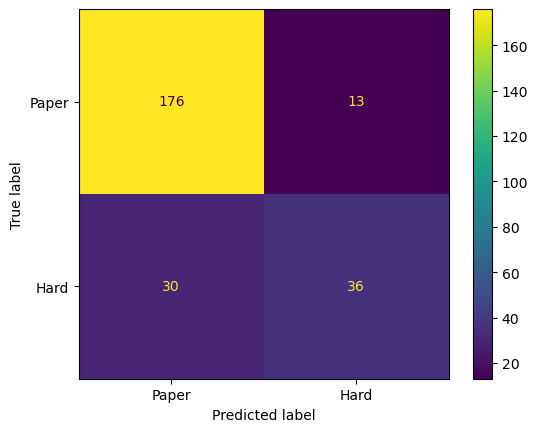

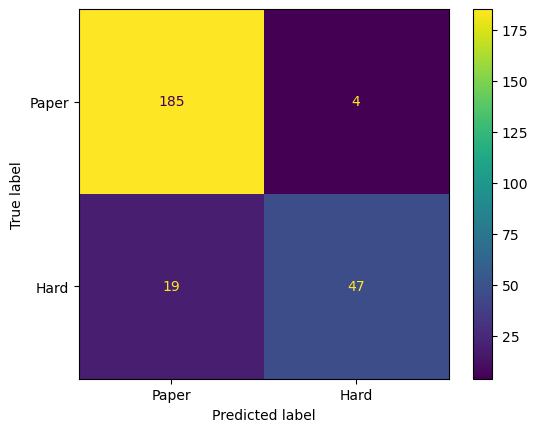

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert target_variable to binary format (0 and 1)
target_variable_binary = target_variable.map({'P': 0, 'H': 1})  # 'P' -> 0, 'H' -> 1

# Confusion matrix for clf (trained on 'List Price')
ConfusionMatrixDisplay(
    confusion_matrix(
        target_variable_binary, 
        clf.predict(ab_train[['List Price']]), 
        labels=[0, 1]
    ),
    display_labels=["Paper", "Hard"]
).plot()

# Confusion matrix for clf2 (trained on 'NumPages', 'Thick', 'List Price')
ConfusionMatrixDisplay(
    confusion_matrix(
        target_variable_binary, 
        clf2.predict(ab_train[['NumPages', 'Thick', 'List Price']]), 
        labels=[0, 1]
    ),
    display_labels=["Paper", "Hard"]
).plot()


the 2 confusion matrices below differ since they each use a different set of variables to make predictions, the top one only uses the listing price while the bottom one uses number of pages, thickness, and listing price even though they are both using clf, a model that is only trained on listing price. the confusion matrices clf and clf2 are better since clf2 is trained with the variables numpage, thick, and listing price and those variables are used in predicting the test group so it accurately represents all the models ability (compared to the bottom 'matrix below' which is trained on listing price but is asked to use numpage, thick, and list price to predict).

8.

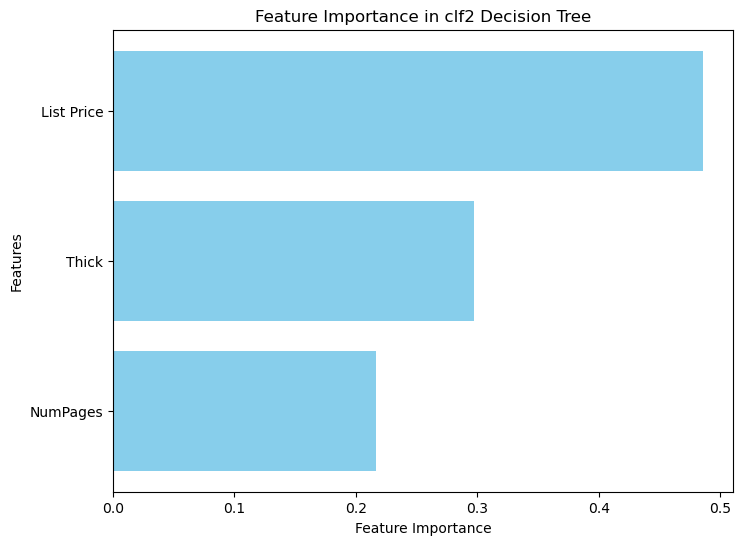

The most important predictor variable for clf2 is: List Price


In [46]:
import matplotlib.pyplot as plt

# Get feature importances from clf2
feature_importances = clf2.feature_importances_
features = clf2.feature_names_in_

# Plotting the feature importances
plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in clf2 Decision Tree")
plt.show()

# Find the most important feature
most_important_feature = features[feature_importances.argmax()]
print(f"The most important predictor variable for clf2 is: {most_important_feature}")


9.

in linear regression, the coefficients represent the value of the direct impact of each predictor variable, the higher the value the higher the impact per unit of predictor variable. the feature importances in decision trees measure how much each feature contributes to the models predictive ability, however they do not provide a direct relationship, they represent the ability of each feature to reduce uncertainty at each decision point in the tree. in a multiple linear regression model you can tell which variable has the most impact just by looking at the coefficient.

10. somewhat

chatbot summary:

Classification Decision Trees (CDTs): You inquired about how CDTs make predictions. We discussed that CDTs split data based on features that best separate classes, using criteria like Gini impurity or entropy. You also learned that CDTs are used for classification problems where the goal is to predict categorical outcomes (e.g., book cover types).

Multiple Linear Regression vs. CDTs: We compared how predictions are made in these models. In linear regression, predictions are made by fitting a line that best describes the relationship between predictors and the target variable, while CDTs split data at decision nodes to classify based on feature values.

Confusion Matrices: You encountered confusion matrices for different models. We discussed the differences in matrices when using different feature sets for predictions, and clarified that the most accurate confusion matrix uses the features on which the model was actually trained.

Visualizing Decision Trees: You learned how to visualize the decision tree and feature importances. This helps understand which features are most influential in making predictions. The .feature_importances_ attribute was used to determine which predictor is most important.

Coefficients vs. Feature Importances: We discussed the difference between interpreting coefficients in linear regression (which directly show how each predictor affects the target) and feature importances in decision trees (which show how much each feature contributes to the model's predictions but without implying a direct relationship).

link: i cant provide a link since it says "Sharing conversations with user uploaded images is not yet supported"